In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Features In This Data Set

1) ID: unique identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglycerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)


In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/my final prediction/cirrhosis.csv")

In [3]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
df.Status.value_counts(dropna=False)

C     232
D     161
CL     25
Name: Status, dtype: int64

In [8]:
df.Status.replace({"C":1 ,"D":0 ,"CL":1},inplace=True)

In [9]:
df.Status.value_counts(dropna=False)

1    257
0    161
Name: Status, dtype: int64

In [10]:
df.Drug.value_counts(dropna=False)

D-penicillamine    158
Placebo            154
NaN                106
Name: Drug, dtype: int64

In [11]:
df.Drug.isna().sum()/df.shape[0]

0.2535885167464115

In [12]:
df[df.Drug.isna()].Hepatomegaly.isna().sum()/df.Drug.isna().sum()

1.0

In [13]:
#because almost 1/4 of the data.Drug is null value,it's better to delete this column.
df.dropna(subset=["Drug"],inplace=True)

In [14]:
df.Drug.isna().sum()

0

In [15]:
df.Hepatomegaly.isna().sum()

0

In [16]:
df.isna().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    int64  
 3   Drug           312 non-null    object 
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          312 non-null    object 
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombi

In [18]:
df.Age.value_counts(dropna=False)

22960    2
16279    2
17525    2
17841    2
22388    1
        ..
12433    1
15712    1
17884    1
20662    1
12109    1
Name: Age, Length: 308, dtype: int64

In [19]:
df["Age"].to_frame()

,Age
0,21464
1,20617
2,25594
3,19994
4,13918
...,...
307,22347
308,21294
309,22767
310,13879


In [20]:
df.Age=df.Age/365

In [21]:
df.Age

0      58.805479
1      56.484932
2      70.120548
3      54.778082
4      38.131507
         ...    
307    61.224658
308    58.339726
309    62.375342
310    38.024658
311    33.175342
Name: Age, Length: 312, dtype: float64

In [22]:
df.Age=np.ceil(df.Age)

In [23]:
df.Age

0      59.0
1      57.0
2      71.0
3      55.0
4      39.0
       ... 
307    62.0
308    59.0
309    63.0
310    39.0
311    34.0
Name: Age, Length: 312, dtype: float64

In [24]:
df.Sex.value_counts(dropna=False)

F    276
M     36
Name: Sex, dtype: int64

In [25]:
df.Ascites.value_counts(dropna=False)

N    288
Y     24
Name: Ascites, dtype: int64

In [26]:
#Ascites is the most common major complication of cirrhosis and is an important landmark in the natural history of chronic liver disease. If observed for 10 years, approximately 60% of patients with cirrhosis develop ascites requiring therapy.
#df.Ascites.replace({"Y":1,"N":0,np.nan:1},inplace=True)

In [27]:
df.Ascites.value_counts(dropna=False)

N    288
Y     24
Name: Ascites, dtype: int64

In [28]:
#because almost 1/4 of the data.Drug is null value,it's better to delete this column.
#df.drop("Hepatomegaly",axis=1,inplace=True)

In [29]:
df.Spiders.value_counts(dropna=False)

N    222
Y     90
Name: Spiders, dtype: int64

In [30]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,D-penicillamine,57.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,D-penicillamine,71.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,Placebo,39.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,1,D-penicillamine,62.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,1,Placebo,59.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,1,D-penicillamine,63.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,1,D-penicillamine,39.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [31]:
df["Cholesterol"].value_counts(dropna=False)

NaN      28
260.0     4
316.0     4
448.0     4
257.0     3
         ..
486.0     1
528.0     1
458.0     1
950.0     1
576.0     1
Name: Cholesterol, Length: 202, dtype: int64

In [32]:
df.dropna(subset=["Cholesterol"],inplace=True)

In [33]:
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           2
Alk_Phos         0
SGOT             0
Tryglicerides    2
Platelets        4
Prothrombin      0
Stage            0
dtype: int64

In [34]:
#df[df.Cholesterol.isna()].Tryglicerides.isna().sum()/df.Cholesterol.isna().sum()



In [35]:
df["Tryglicerides"].fillna(method="ffill",inplace=True)
df["Copper"].fillna(method="ffill",inplace=True)
df["Platelets"].fillna(method="ffill",inplace=True)
                         

In [36]:
df["Cholesterol"].isna().sum()

0

In [37]:
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             284 non-null    int64  
 1   N_Days         284 non-null    int64  
 2   Status         284 non-null    int64  
 3   Drug           284 non-null    object 
 4   Age            284 non-null    float64
 5   Sex            284 non-null    object 
 6   Ascites        284 non-null    object 
 7   Hepatomegaly   284 non-null    object 
 8   Spiders        284 non-null    object 
 9   Edema          284 non-null    object 
 10  Bilirubin      284 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        284 non-null    float64
 13  Copper         284 non-null    float64
 14  Alk_Phos       284 non-null    float64
 15  SGOT           284 non-null    float64
 16  Tryglicerides  284 non-null    float64
 17  Platelets      284 non-null    float64
 18  Prothrombi

In [39]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,D-penicillamine,57.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,D-penicillamine,71.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,Placebo,39.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,1,D-penicillamine,62.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,1,Placebo,59.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,1,D-penicillamine,63.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,1,D-penicillamine,39.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [40]:
df.Ascites.replace({"Y":1,"N":0},inplace=True)
df.Sex.replace({"F":0,"M":1},inplace=True)
df.Hepatomegaly.replace({"Y":1,"N":0},inplace=True)
df.Spiders.replace({"Y":1,"N":0},inplace=True)
df.Edema.replace({"Y":1,"N":0,"S":1},inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             284 non-null    int64  
 1   N_Days         284 non-null    int64  
 2   Status         284 non-null    int64  
 3   Drug           284 non-null    object 
 4   Age            284 non-null    float64
 5   Sex            284 non-null    int64  
 6   Ascites        284 non-null    int64  
 7   Hepatomegaly   284 non-null    int64  
 8   Spiders        284 non-null    int64  
 9   Edema          284 non-null    int64  
 10  Bilirubin      284 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        284 non-null    float64
 13  Copper         284 non-null    float64
 14  Alk_Phos       284 non-null    float64
 15  SGOT           284 non-null    float64
 16  Tryglicerides  284 non-null    float64
 17  Platelets      284 non-null    float64
 18  Prothrombi

<AxesSubplot:>

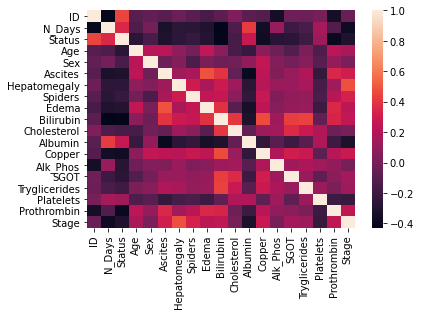

In [42]:
corr=df.corr()
sns.heatmap(corr)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='N_Days'>

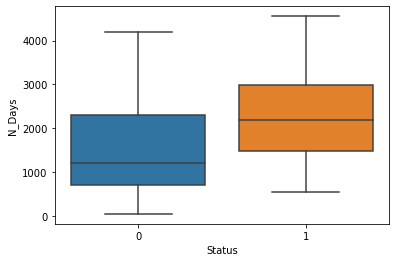

In [43]:
sns.boxplot(df["Status"],df["N_Days"])
#0 -> Death ,1 -> Alive

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='Age'>

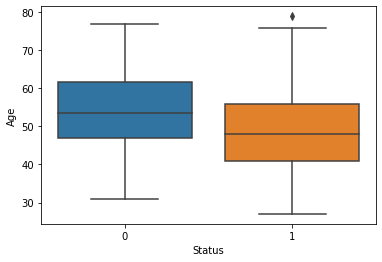

In [44]:
sns.boxplot(df["Status"],df["Age"])


In [45]:
features=["N_Days","Age","Sex","Ascites","Hepatomegaly","Spiders","Edema","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
target=["Status"]

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(df[features],df[target],test_size=.3,random_state=42)

In [96]:
model=LogisticRegression()

In [97]:
model.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
prediction=model.predict(x_test)

In [99]:
prediction=pd.DataFrame(prediction,columns=["pred"])

In [100]:
prediction=np.ceil(prediction)

In [101]:
prediction.replace({-0.0:0.0,2:1},inplace=True)

In [102]:
prediction

,pred
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
81,0.0
82,0.0
83,1.0
84,1.0


In [103]:
y_test

,Status
9,0
280,0
176,1
235,1
83,1
...,...
137,0
242,0
92,1
168,0


In [104]:
y_test=y_test.set_index(prediction.index)

In [105]:
prediction.index

RangeIndex(start=0, stop=86, step=1)

In [106]:
y_test

,Status
0,0
1,0
2,1
3,1
4,1
...,...
81,0
82,0
83,1
84,0


In [107]:
len(prediction)

86

In [108]:
prediction

,pred
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
81,0.0
82,0.0
83,1.0
84,1.0


In [109]:
prediction.value_counts()

pred
1.0     55
0.0     31
dtype: int64

In [110]:
prediction.value_counts()

pred
1.0     55
0.0     31
dtype: int64

In [111]:
#prediction=prediction.set_index("pred")

In [112]:
prediction

,pred
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
81,0.0
82,0.0
83,1.0
84,1.0


In [113]:
result=pd.concat([prediction,y_test],axis=1)

In [114]:
result

,pred,Status
0,0.0,0
1,0.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
81,0.0,0
82,0.0,0
83,1.0,1
84,1.0,0


In [115]:
result.rename({"Status":"real"},axis=1,inplace=True)

In [116]:
result

,pred,real
0,0.0,0
1,0.0,0
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
81,0.0,0
82,0.0,0
83,1.0,1
84,1.0,0


In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
mean_squared_error(result['pred'], result['real']) ** 0.5

0.457495710997814

In [119]:
from sklearn.metrics import accuracy_score

In [128]:
acc_log=accuracy_score(result['pred'],result['real'])

In [129]:
accuracy_score(prediction, y_test)

0.7906976744186046

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result['pred'],result['real'])
print(cm)

[[26  5]
 [13 42]]


In [123]:
from sklearn.model_selection import KFold

In [124]:
xval = KFold(n_splits=5)
allTrainAcc, allTestAcc = [], []
for t_idx, v_idx in xval.split(df[features], df[target]):
    # Slit dataset into two pieces
    train_df = df.iloc[t_idx].copy()
    test_df = df.iloc[v_idx].copy()
    # Train the model
    model = LinearRegression()
    model.fit(train_df[features], train_df[target])
    # Calculate accuracy
    train_df['pred'] = model.predict(train_df[features])
    test_df['pred'] = model.predict(test_df[features])
    trainingAccuracy = mean_squared_error(train_df[target], train_df['pred']) ** 0.5
    testAccuracy = mean_squared_error(test_df[target], test_df['pred']) ** 0.5
    
    allTrainAcc.append(trainingAccuracy)
    allTestAcc.append(testAccuracy)
    
    print('train accuracy: {0}, test accuracy: {1}'.format(trainingAccuracy, testAccuracy))
print('avg train acc', sum(allTrainAcc) / len(allTrainAcc))
print('avg test acc', sum(allTestAcc) / len(allTestAcc))

train accuracy: 0.36648253821378873, test accuracy: 0.53307936484693
train accuracy: 0.362229066336085, test accuracy: 0.45121695294497793
train accuracy: 0.37884976721318886, test accuracy: 0.40001104939199394
train accuracy: 0.3732859185730805, test accuracy: 0.4051732792357937
train accuracy: 0.36486271601395515, test accuracy: 0.4975065795440833
avg train acc 0.3691420012700196
avg test acc 0.4573974451927558


In [126]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

<ipython-input-126-89e2216452a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


In [127]:
acc_random_forest

100.0

In [132]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest'],
    'Score': [ acc_log,
              acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.000000,Random Forest
0.790698,Logistic Regression


In [137]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, prediction))
print("Recall:",recall_score(y_test, prediction))

Precision: 0.7636363636363637
Recall: 0.8936170212765957
